# <center> Tree Models </center>

### Decision Tree basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
iris_df=sns.load_dataset('iris')

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

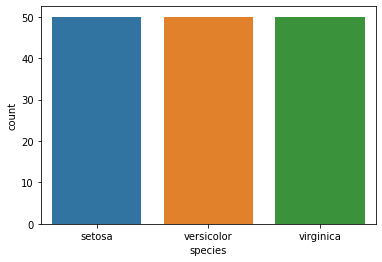

In [5]:
sns.countplot(data = iris_df,x='species')
plt.show()

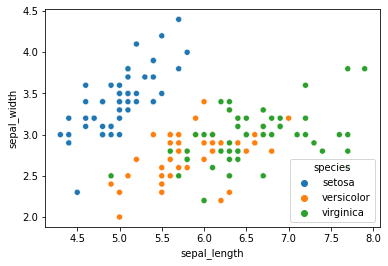

In [9]:
sns.scatterplot(data = iris_df,
               x='sepal_length',
               y='sepal_width',
               hue = 'species')

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.species.unique()) # create map dictionary
iris_df.species=le.transform(iris_df.species) #map data
iris_df.species.unique()


array([0, 1, 2])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
X_train,X_test,y_train,y_test = train_test_split(iris_df[['sepal_length','sepal_width']],
                                                iris_df['species'],
                                                test_size=0.2,
                                                 random_state=42)

In [19]:
tree= DecisionTreeClassifier(max_depth=5,
                            max_features=2)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [20]:
y_pred=tree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.54      0.78      0.64         9
           2       0.75      0.55      0.63        11

    accuracy                           0.73        30
   macro avg       0.76      0.74      0.74        30
weighted avg       0.77      0.73      0.74        30



In [21]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

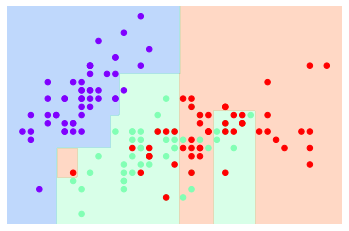

In [22]:
visualize_classifier(tree, iris_df[['sepal_length','sepal_width']],iris_df['species'])

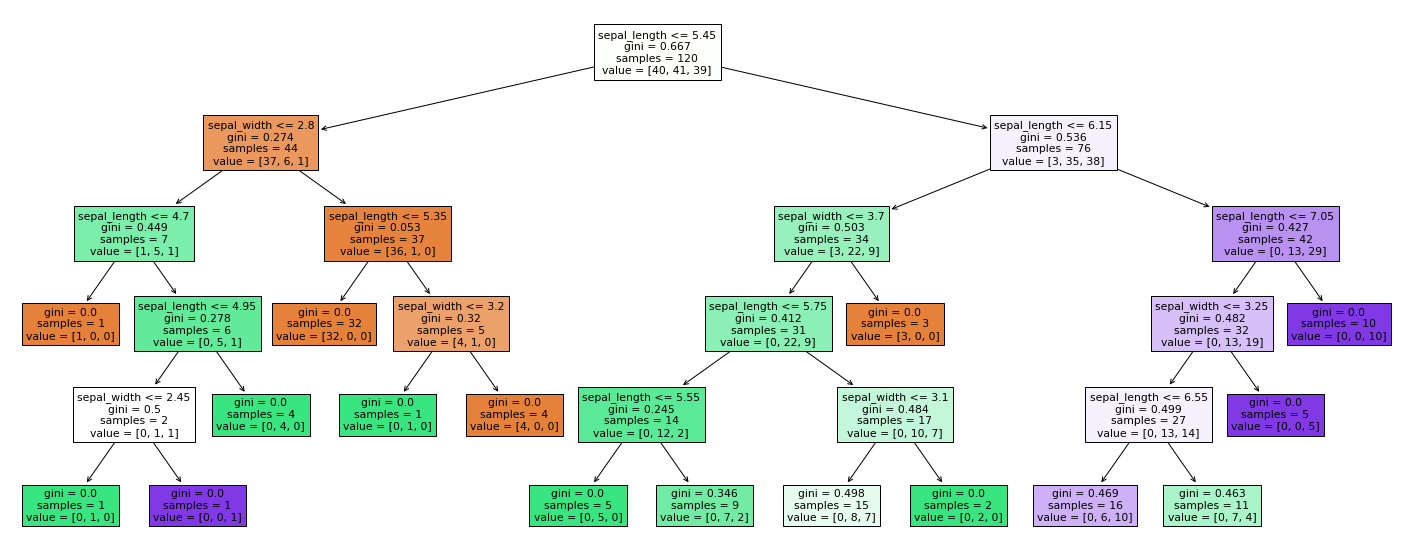

In [26]:
plt.figure(figsize = (25,10))
plot_tree(tree,feature_names = X_train.columns,max_depth=5,filled=True)
plt.show()

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)